In [1]:
import pandas as pd
import sys
import os
sys.path.insert(0, '..')
import seaborn as sns
import matplotlib.pyplot as plt
import spectral_denoising as sd
from spectral_denoising.search_utils import *
from spectral_denoising.file_io import read_df, save_df
from spectral_denoising.spectral_operations import *
from spectral_denoising.spectral_denoising import *
from spectral_denoising.spectra_plotter import *
from spectral_denoising.seven_golden_rules import *
%load_ext autoreload
%autoreload 2
def calculate_ei(peaks_denoised, peaks_raw, pmz):
    peaks_denoised = remove_precursor(peaks_denoised, pmz)
    peaks_raw = remove_precursor(peaks_raw, pmz)
    if isinstance(peaks_denoised, float):
        return 0
    return np.sum(peaks_denoised.T[1]) / np.sum(peaks_raw.T[1])*100
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial'

if os.path.exists(fig_dir) == False:
    os.mkdir(fig_dir)
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'

In [16]:
data_all = read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/supplementary_data/dilution_series_data/dilution_data_all.csv')
data_processed = read_df('/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/supplementary_data/dilution_series_data/dilution_data_mapped.csv')

done read in df...
done read in df...


In [47]:
fig2_source_dir = '/Users/fanzhoukong/Desktop/UCDAVIS_Phd/spectral_denoising/publication_materials/source_data/fig2'

In [4]:
concs = ['500 pmol', '200 pmol', '100 pmol','40 pmol', '10 pmol', '4 pmol', '2 pmol', '1 pmol', '0.4 pmol',
         '0.2 pmol', '0.1 pmol',
         '0.04 pmol', '0.02 pmol']
abs_conc = []
for index, row in data_processed.iterrows():
    abs_conc.append(concs[row['conc']-1])
data_processed['abs_conc'] = abs_conc

In [5]:
data_2c = data_processed[['name', 'mix','abs_conc', 'adduct', 'entropy_similarity', 'denoised_similarity', 'entropy_offset']]

In [9]:
unmapped = data_processed[data_processed['entropy_similarity']<0.75]

In [7]:
polarity = []
for index, row in data_all.iterrows():
    if row['adduct'][-1]=='+':
        polarity.append('pos')
    else:
        polarity.append('neg')
data_all['polarity']=polarity

In [10]:
concs = ['500 pmol', '200 pmol', '100 pmol','40 pmol', '10 pmol', '4 pmol', '2 pmol', '1 pmol', '0.4 pmol',
         '0.2 pmol', '0.1 pmol',
         '0.04 pmol', '0.02 pmol']
abs_conc = []
for index, row in data_all.iterrows():
    abs_conc.append(concs[row['conc']-1])
data_all['abs_conc'] = abs_conc

In [11]:
data_2e = unmapped[['name', 'mix', 'abs_conc', 'adduct', 'entropy_similarity', 'denoised_similarity', 'entropy_dyn','entropy_thres','entropy_reduce']]

In [12]:
data_extended4 = data_processed[['name', 'mix', 'abs_conc', 'adduct', 'entropy_similarity', 'denoised_similarity', 'entropy_dyn','entropy_thres','entropy_reduce']]

In [ ]:
extended_fig_dir = '/Users/fanzhoukong/Desktop/UCDAVIS_Phd/spectral_denoising/publication_materials/source_data/source_data_extended'

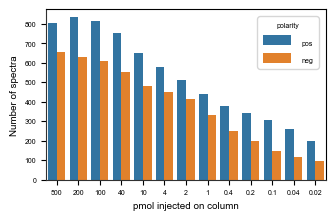

In [18]:
polarity = []
for index, row in data_all.iterrows():
    if row['adduct'][-1]=='+':
        polarity.append('pos')
    else:
        polarity.append('neg')
data_all['polarity']=polarity
concs = ['500 pmol', '200 pmol', '100 pmol','40 pmol', '10 pmol', '4 pmol', '2 pmol', '1 pmol', '0.4 pmol',
         '0.2 pmol', '0.1 pmol',
         '0.04 pmol', '0.02 pmol']
concs = [x.replace(' pmol', '') for x in concs]
count = []
label = []
conc_all =[]
for i in range(0, len(concs)):
    conc_temp = string_search(data_all, 'conc', (i+1))
    pos_temp = string_search(conc_temp, 'polarity', 'pos')
    count.append(len(pos_temp))
    label.append('pos')
    conc_all.append(concs[i])
    neg_temp = string_search(conc_temp, 'polarity', 'neg')

    count.append(len(neg_temp))
    label.append('neg')
    conc_all.append(concs[i])
df = pd.DataFrame(zip(conc_all, label, count), columns=['conc', 'polarity', 'count'])

fig = plt.figure(figsize =(3.46, 3.46/3*2))#43
ax = fig.add_subplot()
sns.barplot(data=df, x="conc", y="count", hue="polarity")
ax.set_xlabel('pmol injected on column',size = 7)
ax.set_ylabel('Number of spectra', size = 7)
plt.grid(False)
ax.set_facecolor("white")

plt.setp(ax.get_legend().get_texts(), fontsize='5')  
    
    # for legend title
plt.setp(ax.get_legend().get_title(), fontsize='5')  
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
ax.tick_params(labelsize=5)
fig.tight_layout()
# plt.savefig(os.path.join(fig_dir, 'n_spectra.eps'), format='eps', dpi=300)

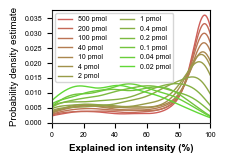

In [19]:
color2 = '#61D837'
color1 = '#CE5F5A'
color = get_color_gradient(color1, color2, 13)
fig = plt.figure(figsize = (2.36,1.73))#43
# plt.subplots_adjust()
ax = fig.add_subplot()
#
concs = ['500 pmol', '200 pmol', '100 pmol','40 pmol', '10 pmol', '4 pmol', '2 pmol', '1 pmol', '0.4 pmol',
         '0.2 pmol', '0.1 pmol',
         '0.04 pmol', '0.02 pmol']
for conc in range(1,14):
    matche_temp = string_search(data_all, 'conc', conc)
    # sns.displot(matche_temp['ei'], kind="ecdf",label= concs[conc-1] , color = color[conc-1])
    sns.kdeplot(matche_temp['ei'], label= concs[conc-1] , color = color[conc-1], clip = [0,100], linewidth = 1)
# plt.xlim(0, 1)
plt.xlim(0, 100)
ax.set_xlabel('Explained ion intensity (%)'  , size = 7,fontdict={'weight': 'bold'})
ax.set_ylabel('Probability density estimate', size = 7)

ax.tick_params(labelsize=5)
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
plt.grid(False)
ax.set_facecolor("white")
# plt.setp(ax.get_legend().get_texts(), fontsize='5')
# plt.legend(facecolor='white', loc = 'upper left' )
# ax.legend(facecolor='white', )
# plt.legend()
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
plt.legend(fontsize='5', title_fontsize='6', loc = 'upper left', ncol=2)
fig.tight_layout()
# plt.savefig(os.path.join(fig_dir,'ei_across_concentrations_font_match.eps'), dpi = 300)

In [20]:
ref_spectra = string_search(data_all, 'conc', 1)
data_all['key']=data_all['name']+data_all['ce'].astype(str)+data_all['conc'].astype(str)+data_all['adduct']

In [21]:
peaks = []
for index, row in data_processed.iterrows():
    temp = string_search(data_all, 'key', row['key'])
    peaks.append(temp['peaks'].iloc[0])
data_processed['peaks'] = peaks

In [22]:
ref_spectra['key']=ref_spectra['name']+ref_spectra['ce'].astype(str)+ref_spectra['adduct']
library_peaks = []
for index, row in data_processed.iterrows():
    temp = string_search(ref_spectra, 'key', row['name']+str(row['ce'])+row['adduct'])
    library_peaks.append(temp['peaks_denoised'].iloc[0])
data_processed['library_peaks'] = library_peaks


In [23]:

msms_d = spectral_denoising_batch(data_processed['peaks'], data_processed['smiles'], data_processed['adduct'], mass_tolerance=0.005)
data_processed['peaks_denoised'] = msms_d
data_processed['ei']= [calculate_ei(data_processed['peaks_denoised'].iloc[i], data_processed['peaks'].iloc[i], data_processed['precursor_mz'].iloc[i]) for i in range(len(data_processed))]
data_processed['entropy_similarity'] =[entropy_similairty(data_processed['peaks'].iloc[i], data_processed['library_peaks'].iloc[i],data_processed['precursor_mz'].iloc[i]) for i in range(len(data_processed))]
data_processed['denoised_similarity'] =[entropy_similairty(data_processed['peaks_denoised'].iloc[i], data_processed['library_peaks'].iloc[i],data_processed['precursor_mz'].iloc[i]) for i in range(len(data_processed))]
data_processed['entropy_offset'] = data_processed['denoised_similarity'] - data_processed['entropy_similarity']

100%|██████████| 6091/6091 [00:23<00:00, 262.95it/s]


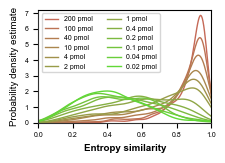

In [24]:
color2 = '#61D837'
color1 = '#CE5F5A'
color = get_color_gradient(color1, color2, 13)
fig = plt.figure(figsize = (2.36,1.73))#43
ax = fig.add_subplot()
#
concs = ['500 pmol', '200 pmol', '100 pmol','40 pmol', '10 pmol', '4 pmol', '2 pmol', '1 pmol', '0.4 pmol',
         '0.2 pmol', '0.1 pmol',
         '0.04 pmol', '0.02 pmol']
for conc in range(1,14):
    matche_temp = string_search(data_processed, 'conc', conc)
    # sns.displot(matche_temp['ei'], kind="ecdf",label= concs[conc-1] , color = color[conc-1])
    sns.kdeplot(matche_temp['entropy_similarity'], label= concs[conc-1] , color = color[conc-1], clip = [0,100], linewidth = 1)
plt.xlim(0, 1)
# plt.xlim(0, 100)
ax.set_xlabel('Entropy similarity'  , size = 7,fontdict={'weight': 'bold'})
ax.set_ylabel('Probability density estimate', size = 7)
ax.tick_params(labelsize=5)
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
plt.grid(False)
ax.set_facecolor("white")
# plt.setp(ax.get_legend().get_texts(), fontsize='5')
plt.legend(facecolor='white', loc = 'upper left', )
# ax.legend(facecolor='white', )
# plt.legend()
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
plt.legend(fontsize='5', title_fontsize='6', loc = 'upper left', ncol=2)
fig.tight_layout()
# plt.savefig(os.path.join(fig_dir,'entropy_similarity_font_match.eps'), dpi = 300)

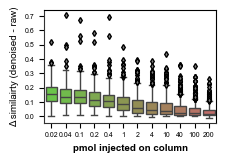

In [25]:
fig = plt.figure(figsize = (2.36,1.73))#43
ax = fig.add_subplot()

color2 = '#61D837'
color1 = '#CE5F5A'
color = get_color_gradient(color1, color2, 12)
color_r = np.flip(color)
#
concs = [ '200 pmol', '100 pmol','40 pmol', '10 pmol', '4 pmol', '2 pmol', '1 pmol', '0.4 pmol',
          '0.2 pmol', '0.1 pmol',
          '0.04 pmol', '0.02 pmol']
conc_num=[200, 100, 40, 10, 4, 2, 1, 0.4, 0.2, 0.1, 0.04, 0.02]
conc_num_str = [str(x) for x in conc_num]
order_arr = np.flip(np.arange(2, 14))
flierprops = {
    'marker': 'd',         # Diamond shape
    'markerfacecolor': 'grey',  # Grey fill
    'markeredgecolor': 'black', # Black edge color
    'markersize': 3,       # Marker size
    'linestyle': 'none'    # Remove line connecting fliers
}

# Create a boxplot with the defined flierprops
sns.boxplot(x='conc', y='entropy_offset', data=data_processed, palette=color_r,order=order_arr,flierprops=flierprops)
ax.set_xticklabels(np.flip(np.array(conc_num_str, dtype=str)))
ax.tick_params(labelsize=5)
plt.xlabel('pmol injected on column',size = 7,  fontdict={'weight': 'bold'})
plt.ylabel('Δ similairty (denoised - raw)',size = 7)
fig.tight_layout()
ax.set_facecolor("white")
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
# plt.savefig(os.path.join(fig_dir,'delta_entropy_font_matched.eps'), dpi = 300)

In [10]:
from spectral_denoising.spectra_plotter import head_to_tail_plot

entropy similarity is 0.2564871907234192
entropy similarity is 0.9492683410644531


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

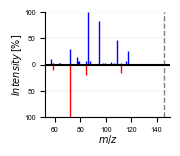

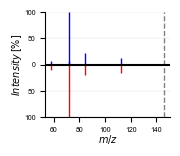

In [48]:
instance = data_processed.sort_values('entropy_offset', ascending=False).iloc[1]
# print(f'this is compound {instance["name"]} with adduct {instance["adduct"]} and precursor_mz {instance["precursor_mz"]}')
head_to_tail_plot(instance['peaks'], instance['library_peaks'], instance['precursor_mz'], publication=True, 
                  savepath=os.path.join(fig_dir,'head_to_tail_plot_raw_'+str(instance['name'])+'.eps'), linewidth=1
                  )
head_to_tail_plot(instance['peaks_denoised'], instance['library_peaks'], instance['precursor_mz'], publication=True, 
                  savepath=os.path.join(fig_dir,'head_to_tail_plot_denoised_'+str(instance['name'])+'.eps'), linewidth=1
                  )

this is compound 3,4-Didesmethyl-5-Deshydroxy-3'-Ethoxyscleroin with adduct [M+H]+ and precursor_mz 275.0925
entropy similarity is 0.5449503064155579
entropy similarity is 0.933928370475769


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

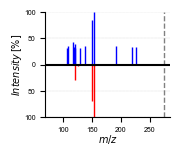

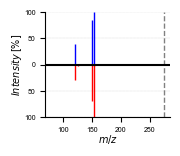

In [114]:
instance = data_processed.sort_values('entropy_offset', ascending=False).loc[5738]
print(f'this is compound {instance["name"]} with adduct {instance["adduct"]} and precursor_mz {instance["precursor_mz"]}')
head_to_tail_plot(instance['peaks'], instance['library_peaks'], instance['precursor_mz'], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_raw_'+str(instance['name'])+'.eps'),linewidth=1)
head_to_tail_plot(instance['peaks_denoised'], instance['library_peaks'], instance['precursor_mz'], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_denoised_'+str(instance['name'])+'.eps'),linewidth=1)

this is compound Enoxolone with adduct [M-H]- and precursor_mz 469.3336
entropy similarity is 0.4172148108482361
entropy similarity is 0.8993633985519409


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/new_env2/lib/python3.12/site-packages/matplotlib/pyplot.py'>

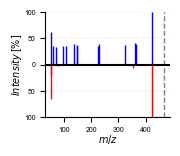

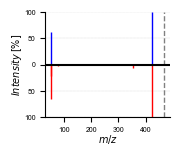

In [116]:
instance = data_processed.sort_values('entropy_offset', ascending=False).loc[4642]
print(f'this is compound {instance["name"]} with adduct {instance["adduct"]} and precursor_mz {instance["precursor_mz"]}')
head_to_tail_plot(instance['peaks'], instance['library_peaks'], instance['precursor_mz'], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_raw_'+str(instance['name'])+'.eps'),linewidth=1)
head_to_tail_plot(instance['peaks_denoised'], instance['library_peaks'], instance['precursor_mz'], publication=True, savepath=os.path.join(fig_dir,'head_to_tail_plot_denoised_'+str(instance['name'])+'.eps'),linewidth=1)

# other denoising methods for benchmarking purpose

In [95]:
entropy_dyn = []
entropy_thres = []
entropy_reduce = []
for index, row in tqdm(data_processed.iterrows(), total =len(data_processed)):
    msms_dyn =dnl_denoising(row['peaks'])
    entropy_dyn.append(entropy_similairty(row['library_peaks'], msms_dyn, pmz = row['precursor_mz']))
    msms_thres =threshold_denoising(row['peaks'], 1)
    entropy_thres.append(entropy_similairty(row['library_peaks'], msms_thres, pmz = row['precursor_mz']))
    msms_reduce = ms_reduce(row['peaks'])
    entropy_reduce.append(entropy_similairty(row['library_peaks'], msms_reduce, pmz = row['precursor_mz']))
data_processed['entropy_dyn']=entropy_dyn
data_processed['entropy_thres']=entropy_thres
data_processed['entropy_reduce']=entropy_reduce

100%|██████████| 6091/6091 [00:34<00:00, 176.28it/s]


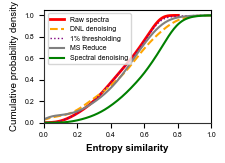

In [7]:
unmapped= data_processed[data_processed['entropy_similarity']<0.7]
# unmapped_ = data_processed[data_processed['entropy_similarity']<0.65]
fig = plt.figure(figsize = (2.36,1.73))#43
# fig = plt.figure(figsize =(5,4))#43
ax = fig.add_subplot()
sns.kdeplot(unmapped['entropy_similarity'], label= 'Raw spectra' , color = 'red', cumulative=True,lw=2 )
sns.kdeplot(unmapped['entropy_dyn'], label= 'DNL denoising' , color = 'orange', cumulative=True, linestyle = '--',)


sns.kdeplot(unmapped['entropy_thres'], label= '1% thresholding' , color = 'purple', cumulative=True, linestyle = ':',lw=1)
sns.kdeplot(unmapped['entropy_reduce'], label= 'MS Reduce' , color = 'grey', cumulative=True)
sns.kdeplot(unmapped['denoised_similarity'], label= 'Spectral denoising' , color = 'green',cumulative=True)
plt.xlim(0, 1)
plt.grid(False)
ax.set_xlabel('Entropy similarity',size = 7,  fontdict={'weight': 'bold'})
ax.set_ylabel('Cumulative probability density', size = 7)
ax.set_facecolor("white")
plt.legend(facecolor='white')
# plt.axvline(1)
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
plt.legend(fontsize='5', title_fontsize='7', loc = 'best')
plt.tick_params(labelsize=5)
fig.tight_layout()

# plt.savefig(os.path.join(fig_dir,'unmapped_method_benchmarking.eps'), dpi = 300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


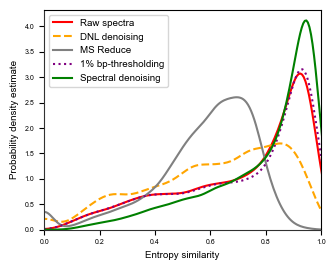

In [51]:
# this is supplementary materials
fig = plt.figure(figsize = (3.46,2.8))#43
ax = fig.add_subplot()
sns.kdeplot(data_processed['entropy_similarity'], label= 'Raw spectra' , color = 'red', cumulative=False)
sns.kdeplot(data_processed['entropy_dyn'], label= 'DNL denoising' , color = 'orange', cumulative=False, linestyle = '--')

sns.kdeplot(data_processed['entropy_reduce'], label= 'MS Reduce' , color = 'grey', cumulative=False)
sns.kdeplot(data_processed['entropy_thres'], label= '1% bp-thresholding' , color = 'purple', cumulative=False, linestyle = ':')
sns.kdeplot(data_processed['denoised_similarity'], label= 'Spectral denoising' , color = 'green',cumulative=False)
plt.xlim(0, 1)
plt.grid(False)
ax.set_xlabel('Entropy similarity',size = 7)
ax.set_ylabel('Probability density estimate', size = 7)
plt.tick_params(labelsize=5)
ax.set_facecolor("white")
plt.legend(facecolor='white')
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
plt.legend(fontsize='7', title_fontsize='7')
# plt.legend()
fig.tight_layout()

plt.savefig(os.path.join(fig_dir,'method_benchmarking_raw.eps'), dpi = 300)

In [95]:

def find_detection_limit(data_temp, msms_type = 'entropy_similarity'):
    for conc in data_temp['conc'].unique():
        tt  = string_search(data_temp, 'conc', conc)
        if tt[msms_type].quantile(0.3)<0.75:
            return(conc)
    return(np.nan)
def find_first_below(numbers, threshold):
    for index, number in enumerate(numbers):
        if number < threshold:
            if index !=0:
                return index-1
            else:
                return index
    return len(numbers)-1
def get_abs_improve(data,col = 'denoised_similarity'):# dilution_mapped.sort_values(by = 'conc', ascending=True, inplace=True)
    level_r = []
    level_d = []
    labels = []
    data['ca_key']=data['name']+data['adduct']
    ref_col = 'name'
    # mrm_validated['ca_key']=mrm_validated['reference_name']+mrm_validated['reference_adduct']
    for n in tqdm(data[ref_col].unique(), total = len(data[ref_col].unique())):
        labels.append(n)
        data_temp = string_search(data, ref_col, n)
        data_temp.sort_values(by = 'conc', ascending=True, inplace=True)
        mapped_d = data_temp[data_temp[col]>0.75]
        idx_r = find_first_below(data_temp['entropy_similarity'], 0.75)
        idx_d = find_first_below(data_temp[col], 0.75)
        if data_temp.iloc[idx_r]['conc']==13:
            level_r.append(np.nan)
            level_d.append(np.nan)
        else:
            level_r.append(data_temp.iloc[idx_r]['conc'])
        # level_d.append(mapped_d['conc'].max())
            level_d.append(data_temp.iloc[idx_d]['conc'])

        # break
    conc_nums=[500,200, 100, 40, 10, 4, 2, 1, 0.4, 0.2, 0.1, 0.04, 0.02]
    abs_conc_diff = []
    for i in range(len(level_r)):
        if level_d[i]==level_d[i] and level_r[i]==level_r[i]:
            # print(i)
            abs_conc_diff.append(conc_nums[level_r[i]-1]/conc_nums[level_d[i]-1])
    df_temp = pd.DataFrame(zip(labels, abs_conc_diff), columns=['names', 'abs_improvment'])
    return(abs_conc_diff)

In [97]:
abs_conc_diff_sd = get_abs_improve(data_processed)
# b
abs_conc_diff_dnl = get_abs_improve(data_processed, 'entropy_dyn')
abs_conc_diff_mr = get_abs_improve(data_processed, 'entropy_reduce')
abs_conc_diff_thr = get_abs_improve(data_processed, 'entropy_thres')

100%|██████████| 181/181 [00:00<00:00, 2637.99it/s]


In [98]:
methods = ['Spectral denoising', '1% bp thresholding', 'DNL denoising', 'MS Reduce']
nested_list = [abs_conc_diff_sd,abs_conc_diff_thr,abs_conc_diff_dnl,abs_conc_diff_mr]
methods_all = []
obs_all = []
for i in range(0,4):
    obs_all.extend(nested_list[i])
    methods_all.extend([methods[i]]*len(nested_list[i]))
df = pd.DataFrame(zip(obs_all, methods_all), columns=['improvement', 'method'])

In [99]:
df.to_csv(os.path.join(fig2_source_dir,'fig2f.csv'), index=False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


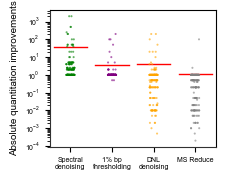

In [48]:
fig = plt.figure(figsize = (2.36,1.9))#43
ax = fig.add_subplot()
p = sns.stripplot(x="method", y="improvement", data=df, size=1.5, color=".7",palette=['green', 'purple', 'orange', 'grey'],
                  alpha = 0.6)
wrap_labels(ax, 10)
p.set(yscale='log')

# plot the mean line
# sns.boxplot(
#             # showmeans=True,
#             meanprops={'color': 'red', 'ls': '-', 'lw': 1},
#             # meanprops={'color': 'red', 'ls': '-', 'lw': 1},
#             medianprops={'visible': False},

#             # {'visible': True,palette=['green', 'purple', 'orange', 'grey'], alpha=0.7},
#             whiskerprops={'visible': False},
#             zorder=10,
#             x="method",
#             y="improvement",
#             palette=['green', 'purple', 'orange', 'grey'],
#             data=df,
#             showfliers=False,
#             showbox=False,
#             showcaps=False,
#             ax=p)
offset = 0.05/2
for i in range(len(methods)):
    mean = df[df['method']==methods[i]]['improvement'].mean()
    plt.axhline(mean, color='red', linestyle='-', xmin=(i)/4+offset, xmax=(i+1)/4-offset, linewidth=1)

p.set_xlabel(None)


wrap_labels(p, 10)
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
p.set_ylabel('Absolute quantitation improvements', size = 7)
plt.tick_params(labelsize=5)
fig.tight_layout()
# plt.show()
ax.set_facecolor("white")
plt.savefig(os.path.join(fig_dir,'abs_conc_diff.eps'), dpi = 300)

# Reproducing results for artificial noise

In [100]:
data_processed['key']=data_processed['name']+data_processed['ce'].astype(str) + data_processed['conc'].astype(str)+ data_processed['adduct']

In [101]:
raw_color =  'red'
dnl_color = 'orange'
mr_color = 'grey'
thr_color = 'purple'
sd_color = 'green'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/fig3'
from spectral_denoising.spectral_operations import *
from spectral_denoising.spectra_plotter import wrap_labels_ylabel
def add_entropy_statistics(data, verbose = False):
    library_se = []
    library_se_pmz = []
    level = []
    level_pmz = []
    entropy_raw = []
    entropy_loss = []
    for index, row in data.iterrows():
        se_temp =spectral_entropy(remove_precursor(row['library_peaks'], row['reference_precursor_mz']))
        se_pmz = spectral_entropy(row['library_peaks'])
        en_raw = entropy_similairty(row['peaks'], row['library_peaks'], pmz = row['reference_precursor_mz'])
        entropy_raw.append(en_raw)
        library_se.append(se_temp)
        entropy_loss.append(en_raw-row['entropy_cont_raw'])
        level.append(int(np.floor(se_temp)))
        level_pmz.append(int(np.floor(se_pmz)))
    data['library_entropy']=library_se
    data['level']=level
    data['level_pmz']=level_pmz
    data['entropy_raw']=entropy_raw
    data['entropy_loss']=entropy_loss
    data['entropy_gain']=(data['entropy_cont_denoised']-data['entropy_cont_raw'])
    se_level = []
    for index, row in data.iterrows():
        se_level.append(str(row['level'])+' to '+str(row['level']+1))
    se_level_pmz = []
    for index, row in data.iterrows():
        se_level_pmz.append(str(row['level_pmz'])+' to '+str(row['level_pmz']+1))
    data['Spectral entropy'] = se_level
    data['spectral_entropy_pmz'] = se_level_pmz
    if verbose:
        print('entropy gain for entropy 0-1 is: ',data[data['level']==0]['entropy_gain'].median())
        print('entropy gain for entropy 1-2 is: ',data[data['level']==1]['entropy_gain'].median())
        print('entropy gain for entropy 2-3 is: ',data[data['level']==2]['entropy_gain'].median())
        print('entropy gain for entropy 3-4 is: ',data[data['level']==3]['entropy_gain'].median())
        print('entropy gain for entropy 4-5 is: ',data[data['level']==4]['entropy_gain'].median())
        print('entropy loss for entropy 0-1 is: ',data[data['level']==0]['entropy_loss'].median())
        print('entropy loss for entropy 1-2 is: ',data[data['level']==1]['entropy_loss'].median())
        print('entropy loss for entropy 2-3 is: ',data[data['level']==2]['entropy_loss'].median())
        print('entropy loss for entropy 3-4 is: ',data[data['level']==3]['entropy_loss'].median())
        print('entropy loss for entropy 4-5 is: ',data[data['level']==4]['entropy_loss'].median())
    return(data)
dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/synthetic_noise'
def process_artificial_noise(dir, chemical_noise_level, electronic_noise_level):
    data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
    denoised_peaks_all = sd.spectral_denoising_batch(data_contaminated['msms_cont'], data_contaminated['smiles'], data_contaminated['adduct'])
    data_contaminated['msms_cont_denoised']=denoised_peaks_all
    data_contaminated['entropy_cont_denoised']=[entropy_similairty(data_contaminated['msms_cont_denoised'].iloc[i], data_contaminated['library_peaks'].iloc[i],data_contaminated['precursor_mz'].iloc[i]) for i in range(len(data_contaminated))]

    entropy_dyn = []
    entropy_thres = []
    entropy_reduce = []
    for index, row in tqdm(data_contaminated.iterrows(), total =len(data_contaminated)):
        msms_dyn =dnl_denoising(row['msms_cont'])
        entropy_dyn.append(entropy_similairty(row['library_peaks'], msms_dyn, pmz = row['precursor_mz']))
        msms_thres =threshold_denoising(row['msms_cont'], 1)
        entropy_thres.append(entropy_similairty(row['library_peaks'], msms_thres, pmz = row['precursor_mz']))
        msms_reduce = ms_reduce(row['msms_cont'])
        entropy_reduce.append(entropy_similairty(row['library_peaks'], msms_reduce, pmz = row['precursor_mz']))
    data_contaminated['entropy_dyn']=entropy_dyn
    data_contaminated['entropy_thres']=entropy_thres
    data_contaminated['entropy_reduce']=entropy_reduce
    data_contaminated = add_entropy_statistics(data_contaminated)
    return data_contaminated
def plot_function(data_contaminated,chemical_noise_level, electronic_noise_level):
    # fig = plt.figure(figsize = (2.36, 2.36/4*3))#43
    fig = plt.figure(figsize = (2, 2/4*3))#43
    ax = fig.add_subplot()
    sns.kdeplot(data_contaminated['entropy_cont_raw'], label= 'Raw spectra', color = raw_color, linewidth = 1)
    sns.kdeplot(data_contaminated['entropy_cont_denoised'], label= 'Spectral denoising' ,color= sd_color,linewidth = 1)

    sns.kdeplot(data_contaminated['entropy_reduce'], label= 'MS Reduce' ,color= mr_color,linewidth = 1)
    sns.kdeplot(data_contaminated['entropy_dyn'], label= 'DNL denoising' ,color= dnl_color,linestyle = '--',linewidth = 1)
    sns.kdeplot(data_contaminated['entropy_thres'], label= '1% bp thresholding' ,color= thr_color, linestyle = ':',linewidth = 1)
    ax.set_xlabel('Entropy similarity', size = 7)
    ax.set_ylabel('Probability density\nestimate', size = 7)
    ax.set_facecolor("white")
    ax.set_xlim(0,1)
    plt.legend([],[], frameon=False)
    ax.tick_params(labelsize=5)
    fig.tight_layout()
    ax.spines['left'].set_color('#313131')
    ax.spines['bottom'].set_color('#313131')
    ax.spines[['right', 'top']].set_visible(False)
    # wrap_labels_ylabel(ax, 5)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_dir,f'{chemical_noise_level}_{electronic_noise_level}_sn.eps'), dpi = 300)





    fig = plt.figure(figsize = (2, 2/4*3))#43
    ax = fig.add_subplot()
    # plt.legend(title='Spectral entropy', loc='upper right', labels=['0-1', '1-2','2-3','3-4','4-5']
    ax.set_ylabel('Probability density\nestimate', size = 7)
    ax.set_xlabel('Entropy similarity improvement', size = 7)
    ax.tick_params(labelsize=5)
    ax.set_xlim(0,1)
    sns.kdeplot(data_contaminated, x="entropy_gain", hue="spectral entropy",palette="muted", fill = False, multiple='layer',common_norm=False, hue_order = ['0 to 1','1 to 2', '2 to 3', '3 to 4', '4 to 5'], linewidth = 1)

    # sns.kdeplot(sn1, x="entropy_gain", hue="level", multiple="layer",palette="pastel",common_norm=False,)
    # plt.legend(title='Spectral entropy', loc='upper left', labels=['0-1', '1-2','2-3','3-4','4-5'], facecolor = 'white')
    plt.grid(False)
    plt.tight_layout()
    ax.set_facecolor("white")
    
    ax.spines['left'].set_color('#313131')
    ax.spines['bottom'].set_color('#313131')
    ax.spines[['right', 'top']].set_visible(False)
    # plt.setp(ax.get_legend().get_texts(), fontsize='5') # for legend text
    # plt.setp(ax.get_legend().get_title(), fontsize='5')
    # plt.legend(fontsize='5', title_fontsize='5')
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_dir, f'{chemical_noise_level}_{electronic_noise_level}_entropy_gain.eps'), dpi = 300)
def plot_larger_entropy_gain(data_contaminated,chemical_noise_level, electronic_noise_level, hue_type = 'spectral entropy'):
    fig = plt.figure(figsize = (1.73, 1.4))#43
    ax = fig.add_subplot()
    # plt.legend(title='Spectral entropy', loc='upper right', labels=['0-1', '1-2','2-3','3-4','4-5'])
    # ax.set_xlabel('Entropy similarity improvement')
    ax.set_xlim(0,1)
    sns.kdeplot(data_contaminated, x="entropy_gain", hue=hue_type,palette="muted", fill = False, multiple='layer',common_norm=False, hue_order = ['0 to 1','1 to 2', '2 to 3', '3 to 4', '4 to 5'], linewidth = 1)

    # sns.kdeplot(sn1, x="entropy_gain", hue="level", multiple="layer",palette="pastel",common_norm=False,)
    # plt.legend(title='Spectral entropy', loc='upper left', labels=['0-1', '1-2','2-3','3-4','4-5'], facecolor = 'white')
    plt.grid(False)
    plt.tight_layout()
    ax.set_facecolor("white")
    ax.spines['left'].set_color('#313131')
    ax.spines['bottom'].set_color('#313131')
    ax.spines[['right', 'top']].set_visible(False)
    # sns.move_legend(ax, labelspacing=0.3, loc='best')
    # plt.setp(ax.get_legend().get_texts(), fontsize='5')  
    
    # # for legend title
    # plt.setp(ax.get_legend().get_title(), fontsize='5')  
    
    ax.set_xlabel('Entropy similairty\nimprovement', size = 5)
    ax.set_ylabel('Probability density\nestimate', size = 5)
    plt.tick_params(labelsize=5)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig(os.path.join(fig_dir, f'{chemical_noise_level}_{electronic_noise_level}_entropy_gain_enlarged.eps'), dpi = 300)
    

In [103]:
fig3_dir = '/Users/fanzhoukong/Desktop/UCDAVIS_Phd/spectral_denoising/publication_materials/source_data/fig3'

In [102]:

chemical_noise_level = 0.5
electronic_noise_level = 100
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)

data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
# data_contaminated = data_contaminated.iloc[:, :-3]

done read in df...


In [112]:
data_contaminated_main_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_cont_raw', 'entropy_cont_denoised','entropy_dyn' , 'entropy_thres','entropy_reduce']]
data_extended_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_gain', 'spectral entropy']]
data_contaminated_main_figure.to_csv(os.path.join(fig3_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)
data_extended_figure.to_csv(os.path.join(extended_fig_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)

done read in df...


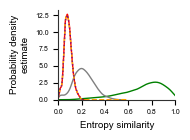

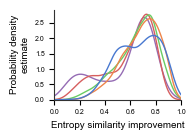

In [88]:

chemical_noise_level = 0.5
electronic_noise_level = 100
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)

data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-3]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

done read in df...


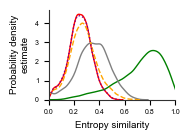

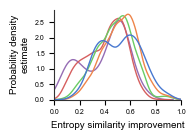

In [90]:

chemical_noise_level = 0.5
electronic_noise_level = 10
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
# plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

In [114]:
chemical_noise_level = 0.5
electronic_noise_level = 10
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
data_contaminated_main_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_cont_raw', 'entropy_cont_denoised','entropy_dyn' , 'entropy_thres','entropy_reduce']]
data_extended_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_gain', 'spectral entropy']]
data_contaminated_main_figure.to_csv(os.path.join(fig3_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)
data_extended_figure.to_csv(os.path.join(extended_fig_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)

done read in df...


done read in df...


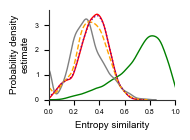

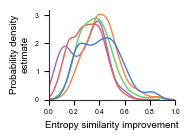

In [91]:

chemical_noise_level = 0.5
electronic_noise_level = 2
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

In [115]:
chemical_noise_level = 0.5
electronic_noise_level = 2
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
data_contaminated_main_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_cont_raw', 'entropy_cont_denoised','entropy_dyn' , 'entropy_thres','entropy_reduce']]
data_extended_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_gain', 'spectral entropy']]
data_contaminated_main_figure.to_csv(os.path.join(fig3_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)
data_extended_figure.to_csv(os.path.join(extended_fig_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)

done read in df...


done read in df...


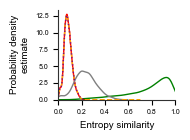

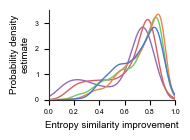

In [92]:
chemical_noise_level = 0.2
electronic_noise_level = 100
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

In [121]:
chemical_noise_level = 0.1
electronic_noise_level = 2
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
data_contaminated_main_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_cont_raw', 'entropy_cont_denoised','entropy_dyn' , 'entropy_thres','entropy_reduce']]
data_extended_figure = data_contaminated[['name','smiles', 'adduct','precursor_mz', 'entropy_gain', 'spectral entropy']]
data_contaminated_main_figure.to_csv(os.path.join(fig3_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)
data_extended_figure.to_csv(os.path.join(extended_fig_dir, str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'), index=False)

done read in df...


done read in df...


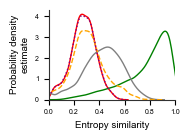

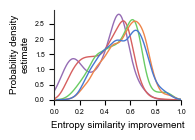

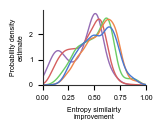

In [104]:
chemical_noise_level = 0.2
electronic_noise_level = 10
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
plot_larger_entropy_gain(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

done read in df...


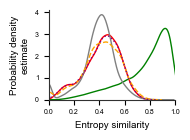

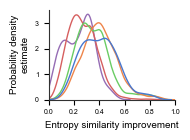

In [96]:
chemical_noise_level = 0.2
electronic_noise_level = 2
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

done read in df...


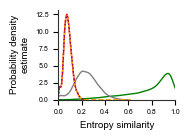

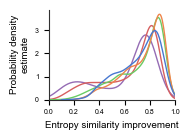

In [97]:
chemical_noise_level = 0.1
electronic_noise_level = 100
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

done read in df...


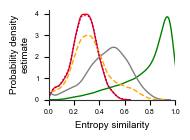

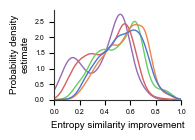

In [98]:
chemical_noise_level = 0.1
electronic_noise_level = 10
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))

In [103]:
chemical_noise_level = 0.1
electronic_noise_level = 2
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]

done read in df...


done read in df...


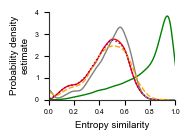

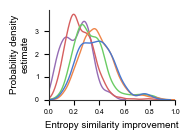

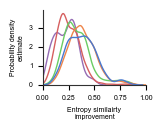

In [ ]:
chemical_noise_level = 0.1
electronic_noise_level = 2
# data_contaminated = process_artificial_noise(dir, chemical_noise_level, electronic_noise_level)
data_contaminated = read_df(os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))
data_contaminated = data_contaminated.iloc[:, :-2]
# plot_function(data_contaminated,chemical_noise_level, electronic_noise_level)
# plot_larger_entropy_gain(data_contaminated,chemical_noise_level, electronic_noise_level)
# save_df(data_contaminated, os.path.join(dir, 'synthetic_noise_sn_'+str(chemical_noise_level)+'_'+str(electronic_noise_level)+'.csv'))